#DSCI 617–HW 03 
**Shahid Abdulaziz**

In [0]:
import math
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.mllib.random import RandomRDDs
from string import punctuation
from operator import add
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, LongType
import matplotlib.pyplot  as plt
from pyspark.sql.functions import col, expr
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc

## Problem 1: Terminology
Create a markdown containing a numbered list with answers to the following questions. You only need to provide the answers and are not required to retype the questions.

1. What is the name of the class that is used to define a schema?
  * StructType

2. What is the name of the class that is used to represent a column within a schema? 
  *  StructField
3. What is the name of a class used to indicate that a column is intended to store floating point values?
  * DoubleType
4. What DataFrame method is used to display the contents of the DataFrame?
  * show()
5. What two DataFrame methods are used to display summary statistics (such as count, mean, standard deviation, min, and max) for each column in a DataFrame?
  * Summary(), describe()
6. What DataFrame method is used to remove rows with missing entries from the DataFrame?
  * dropna()
7. Name two methods that can be used to add columns to a DataFrame.
  *  df.withColumn, df.select()
8. What method is used to perform one or more custom aggregations after grouping?
  * agg() 
9. Name two Spark functions that accept as arguments strings representing names of DataFrame columns and return column objects.
  * col(), expr()
10. What DataFrame transformation returns a DataFrame containing all of the columns from the original DataFrame, but only the rows that satisfy a stated condition?
  * .filter()

## Problem 2: Columns and Expressions

Assume that you have access to a DataFrame namedsales_df with the following schema:

root

|--customerID: string (nullable = true)

|--productID: string (nullable = true)

|--units: long (nullable = true)

|--unit_price: double (nullable = true)

Determine which of the lines of code shown below would run without error. Create a markdown cell to provide your answer.The answer should be given in the form of a list of integers corresponding to the numbers of the linesthat wouldrun without error.

1. sales_df.select('unit_price', 'units').show()
2. sales_df.select(col('unit_price'), expr('units')).show()
3. sales_df.select('unit_price * units').show()
4. sales_df.select(col('unit_price * units')).show()
5. sales_df.select(expr('unit_price * units')).show()
6. sales_df.select(col('unit_price') * col('units')).show()
7. sales_df.select(expr('unit_price') * expr('units')).show()
8. sales_df.select('sum(units)').show()
9. sales_df.select(col('sum(units)')).show()
10. sales_df.select(expr('sum(units)')).show()

1,2,5,6,10

## Problem3: Diamonds Data(Part 1)
For the remainder of this assignment, we will again be working with the Diamonds dataset. Recall that the data file for this dataset is located at the path: /FileStore/tables/diamonds.txt

Recall also that each row of this data file contains the following information for a single diamond:
* **carat** Weight of the diamond.
* **cut** Quality of the cut. Levels: Fair, Good, Very Good, Premium, Ideal
* **color** Diamond color. Levels:J, I, H, G, F, E,D
* **clarity** A measureof diamond clarity. Levels: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
* **depth** Total depth percentage 
* **table** Width of top of diamond relative to widest point 
* **price** Price in US dollars
* **x** Length in mm
* **y** Width in mm 
* **z** Depth in mm 

We will begin by loading the dataset into a DataFrame.For the purposes of creating a schema, note that the pricecolumncontains integer values. The cut, color, and claritycolumnseach contain string values. All other columnscontain floating point (or double) values.

Create a code cell to complete the following tasks:
1. Create a custom schema for this dataset. I recommend using a DDL string. 
2. Read the file into a DataFrame named diamondsusing spark.read(). Note that the file is tab-delimited and has a header. 
3. Use printSchema()to displaythe DataFrame's schema.

In [0]:
diamonds_schema  = (
    'carat DOUBLE, cut STRING, color STRING, clarity STRING, '
    'depth DOUBLE, table DOUBLE, price INTEGER, x DOUBLE, ' 
    ' y DOUBLE, z DOUBLE')
 

diamonds = (
    spark.read
    .option('delimiter', '\t')
    .option('header', True)
    .schema(diamonds_schema)
    .csv('/FileStore/tables/diamonds.txt')
)


    
diamonds.printSchema()

root
-- carat: double (nullable = true)
-- cut: string (nullable = true)
-- color: string (nullable = true)
-- clarity: string (nullable = true)
-- depth: double (nullable = true)
-- table: double (nullable = true)
-- price: integer (nullable = true)
-- x: double (nullable = true)
-- y: double (nullable = true)
-- z: double (nullable = true)

Create a new code cell and use it to display the number of rows in the diamondsDataFram

In [0]:
diamonds.count()

Out[3]: 53940

Use the show() method  to display the first 10 rows of the diamondsDataFrame.

In [0]:
  diamonds.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 0.23| Ideal| E| SI2| 61.5| 55.0| 326|3.95|3.98|2.43|
 0.21| Premium| E| SI1| 59.8| 61.0| 326|3.89|3.84|2.31|
 0.23| Good| E| VS1| 56.9| 65.0| 327|4.05|4.07|2.31|
 0.29| Premium| I| VS2| 62.4| 58.0| 334| 4.2|4.23|2.63|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75|
 0.24|Very Good| J| VVS2| 62.8| 57.0| 336|3.94|3.96|2.48|
 0.24|Very Good| I| VVS1| 62.3| 57.0| 336|3.95|3.98|2.47|
 0.26|Very Good| H| SI1| 61.9| 55.0| 337|4.07|4.11|2.53|
 0.22| Fair| E| VS2| 65.1| 61.0| 337|3.87|3.78|2.49|
 0.23|Very Good| H| VS1| 59.4| 61.0| 338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows

Create a code cell to complete the following tasks:
1. Use the sample() method to draw a sample from diamonds. Use fraction=0.25 and seed=1. Convert the sample to a Pandas DataFrame and store the result in sample_pdf.
2. Use the data in the sample to create a scatter plot of priceversus carat. When creating the scatter plot, set alpha=0.5and select a named colorfor the points. Label the x-axis"Carat" and label the y-axis "Price". Use plt.show() to display the plot.

In [0]:
 sample_pdf = diamonds.sample(fraction=0.25, seed=1).toPandas()

No handles with labels found to put in legend.
Out[6]:

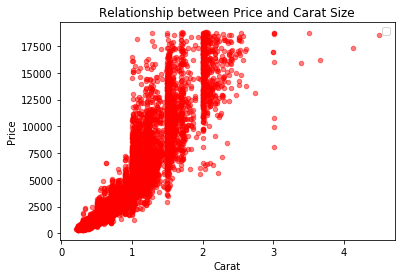

<function matplotlib.pyplot.show(*args, **kw)>

In [0]:
plt.scatter( sample_pdf.carat, sample_pdf.price, alpha = .5, s= 20, c = 'red' )
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Relationship between Price and Carat Size')
plt.legend()
plt.show



## Problem4:Diamonds Data(Part 2)
We will continue working with the Diamonds dataset in this problem. We will start by using sorting to identify the most expensive diamonds in the dataset.

Sort the contents of the diamonds DataFrame in descending order by price. Use show() |to display the first 5 rows of the sorted DataFrame.

In [0]:
diamonds.toPandas().sort_values(by = 'price',ascending=False).head(5) #alt way to do in in panadas
diamonds.sort(desc('price')).show(5) # requested way to do it

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 2.29| Premium| I| VS2| 60.8| 60.0|18823| 8.5|8.47|5.16|
 2.0|Very Good| G| SI1| 63.5| 56.0|18818| 7.9|7.97|5.04|
 1.51| Ideal| G| IF| 61.7| 55.0|18806|7.37|7.41|4.56|
 2.07| Ideal| G| SI2| 62.5| 55.0|18804| 8.2|8.13|5.11|
 2.0|Very Good| H| SI1| 62.8| 57.0|18803|7.95| 8.0|5.01|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows

Sort the contents of the diamondsDataFrame in descending order by carat. Useshow()to display the first 5 rows of the sorted DataFrame.

In [0]:
diamonds.toPandas().sort_values(by = 'carat',ascending=False).head(5) #Alt way to do it
diamonds.sort(desc('carat')).show(5) # requested way to do it

+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
 5.01| Fair| J| I1| 65.5| 59.0|18018|10.74|10.54|6.98|
 4.5| Fair| J| I1| 65.8| 58.0|18531|10.23|10.16|6.72|
 4.13| Fair| H| I1| 64.8| 61.0|17329| 10.0| 9.85|6.43|
 4.01|Premium| J| I1| 62.5| 62.0|15223|10.02| 9.94|6.24|
 4.01|Premium| I| I1| 61.0| 61.0|15223|10.14| 10.1|6.17|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
only showing top 5 rows

Create a code cell to complete the following tasks:
1. Create a new DataFrame named diamonds_ppc. This DataFrame should contain all columns from diamonds but should also contain a column named price_per_carat. Values in this new column should be equal to the price of the diamond divided by the carat size, rounded to 2 decimal places.
2. Sort the contents of the diamonds_ppcDataFrame in descending order by price_per_carat. Useshow() to display the first 5 rows of the sorted DataFrame.

In [0]:
diamonds_ppc = diamonds.select('*',
    expr('round(price /carat,2) AS price_per_carat') 
)

In [0]:
diamonds_ppc.sort(desc('price_per_carat')).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
 1.04|Very Good| D| IF| 61.3| 56.0|18542|6.53|6.55|4.01| 17828.85|
 1.07| Premium| D| IF| 60.9| 58.0|18279|6.67|6.57|4.03| 17083.18|
 1.03| Ideal| D| IF| 62.0| 56.0|17590|6.55|6.44|4.03| 17077.67|
 1.07|Very Good| D| IF| 60.9| 58.0|18114|6.57|6.67|4.03| 16928.97|
 1.02|Very Good| D| IF| 61.7| 59.0|17100|6.42|6.52|3.99| 16764.71|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

Sort the contents of the diamonds_ppcDataFrame in ascending order by price_per_carat. Useshow() to display the first 5 rows of the sorted DataFrame.

In [0]:
diamonds_ppc.sort(asc('price_per_carat')).show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
 0.43|Premium| H| I1| 62.0| 59.0| 452|4.78|4.83|2.98| 1051.16|
 0.32|Premium| E| I1| 60.9| 58.0| 345|4.38|4.42|2.68| 1078.13|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75| 1080.65|
 0.33| Ideal| J| SI2| 62.4| 54.0| 366|4.43|4.45|2.77| 1109.09|
 0.31| Ideal| J| SI2| 62.2| 54.0| 344|4.35|4.37|2.71| 1109.68|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

Create a code cell to complete the following tasks:
1. Use the sample() method to draw a sample from diamonds_ppc. Use fraction=0.25 and seed=1. Convert the sample to a Pandas DataFrame and store the result in ppc_ample_pdf.
2. Use the data in the sample to create a scatter plot of price_per_caratversus carat. When creating the scatter plot, set alpha=0.5and select a named color for the points. Label the x-axis "Carat"and label the y-axis "Price per Carat". Use plt.show()to display the plot.

No handles with labels found to put in legend.
Out[12]:

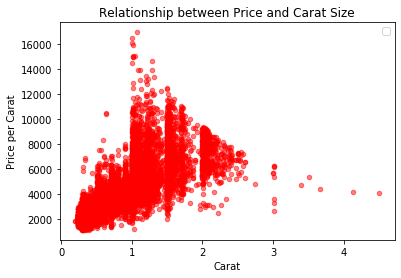

<function matplotlib.pyplot.show(*args, **kw)>

In [0]:
ppc_ample_pdf = diamonds_ppc.sample(fraction=0.25, seed=1).toPandas()

plt.scatter(ppc_ample_pdf.carat, ppc_ample_pdf.price_per_carat, alpha = .5, s= 20, c = 'red' )
plt.xlabel('Carat')
plt.ylabel('Price per Carat')
plt.title('Relationship between Price and Carat Size')
plt.legend()
plt.show